In [2]:
from styxdefs import set_global_runner
from styxsingularity import SingularityRunner

# Initialize the SingularityRunner with your container images
runner = SingularityRunner(
    images={
        "antsx/ants:v2.5.3" : "./images/ants_v2.5.3.sif",
        "afni/afni_make_build:AFNI_24.2.06" : "./images/afni_24.2.06.sif",
        "mcin/fsl:6.0.5": "./images/fsl_6.0.5.sif"
    }
)

# Set the global runner for Styx
set_global_runner(runner)


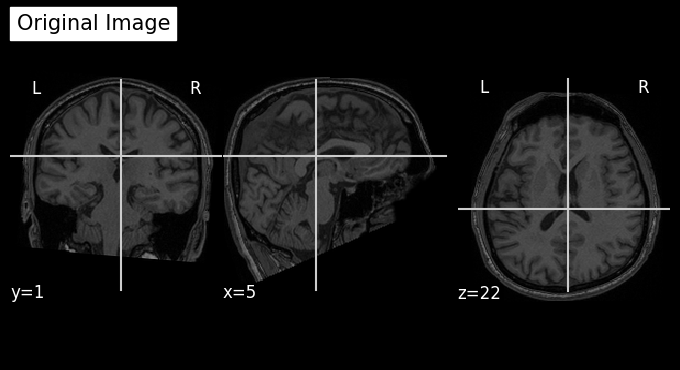

: 

In [1]:
import os
from nilearn.plotting import plot_anat
base = "/ocean/projects/med220004p/bshresth/projects/niwrap"
input_image = os.path.join(base,"data/neurocon/sub-control032014/anat/sub-control032014_T1w.nii.gz")
plot_anat(input_image, title="Original Image", display_mode="ortho")

In [7]:
### Anat Init Block ###
from nodeblocks.anat_preproc import anat_init
resampled = anat_init(input_image)

[D] Running singularity: singularity exec --bind /ocean/projects/med220004p/bshresth/projects/niwrap/T1w.nii.gz:/styx_input/0/T1w.nii.gz --bind /ocean/projects/med220004p/bshresth/projects/niwrap/styx_tmp/5d195b7d32e8d50a_4_3drefit:/styx_output images/afni_24.2.06.sif /bin/bash /styx_output/run.sh
[D] Running command: 3drefit -deoblique /styx_input/0/T1w.nii.gz


[E] ++ 3drefit: AFNI version=AFNI_24.2.06 (Sep 12 2024) [64-bit]
[E] ++ Authored by: RW Cox
[E] ++ Processing AFNI dataset /styx_input/0/T1w.nii.gz
[E]  + deoblique
[E]  + loading and re-writing dataset /styx_input/0/T1w.nii.gz (/styx_input/0/T1w.nii.gz in NIFTI storage)
[E] ++ 3drefit processed 1 datasets
[I] Executed 3drefit in 0:00:02.888947
[D] Running singularity: singularity exec --bind /ocean/projects/med220004p/bshresth/projects/niwrap/data/neurocon/sub-control032014/anat/sub-control032014_T1w.nii.gz:/styx_input/0/sub-control032014_T1w.nii.gz:ro --bind /ocean/projects/med220004p/bshresth/projects/niwrap/styx_tmp/5d195b7d32e8d50a_5_3dresample:/styx_output images/afni_24.2.06.sif /bin/bash /styx_output/run.sh
[D] Running command: 3dresample -inset /styx_input/0/sub-control032014_T1w.nii.gz -orient RPI -prefix desc-preproc_T1w.nii.gz
[E] *+ WARNING:   If you are performing spatial transformations on an oblique dset,
[E]   such as /styx_input/0/sub-control032014_T1w.nii.gz,
[E]   o

In [4]:
### Skull Stripping Block ###
from nodeblocks.anat_preproc import brain_mask_fsl
skull_stripped = brain_mask_fsl(resampled.out_file)
skull_stripped_image = skull_stripped.outfile

[D] Running singularity: singularity exec --bind /ocean/projects/med220004p/bshresth/projects/niwrap/styx_tmp/5d195b7d32e8d50a_1_3dresample/desc-preproc_T1w.nii.gz:/styx_input/0/desc-preproc_T1w.nii.gz:ro --bind /ocean/projects/med220004p/bshresth/projects/niwrap/styx_tmp/5d195b7d32e8d50a_2_bet:/styx_output images/fsl_6.0.5.sif /bin/bash /styx_output/run.sh
[D] Running command: bet /styx_input/0/desc-preproc_T1w.nii.gz img_bet -m
[I] Executed bet in 0:00:04.889356


In [ ]:
# from nodeblocks.anat_preproc import brain_mask_ants
# template_path = os.path.join(base,"oasis_data/MICCAI2012-Multi-Atlas-Challenge-Data/T_template0.nii.gz")
# mask_path=os.path.join(base,"oasis_data/MICCAI2012-Multi-Atlas-Challenge-Data/T_template0_BrainCerebellumProbabilityMask.nii.gz")
# regmask_path =os.path.join(base,"oasis_data/MICCAI2012-Multi-Atlas-Challenge-Data/T_template0_BrainCerebellumRegistrationMask.nii.gz")
# skull_stripped = brain_mask_ants(input_image, template_path, mask_path)
# skull_stripped_image = skull_stripped.brain_extracted_image

In [5]:
### N4 Bias Field Correction Block ###
from nodeblocks.anat_preproc import n4biasfieldcorrection
out = n4biasfieldcorrection(skull_stripped_image)

[D] Running singularity: singularity exec --bind /ocean/projects/med220004p/bshresth/projects/niwrap/styx_tmp/5d195b7d32e8d50a_2_bet/img_bet.nii.gz:/styx_input/0/img_bet.nii.gz:ro --bind /ocean/projects/med220004p/bshresth/projects/niwrap/styx_tmp/5d195b7d32e8d50a_6_n4_bias_field_correction:/styx_output images/ants_v2.5.3.sif /bin/bash /styx_output/run.sh
[D] Running command: N4BiasFieldCorrection --image-dimensionality 3 --shrink-factor 2 --input-image /styx_input/0/img_bet.nii.gz --output '[corrected.nii.gz,bias.nii.gz]'


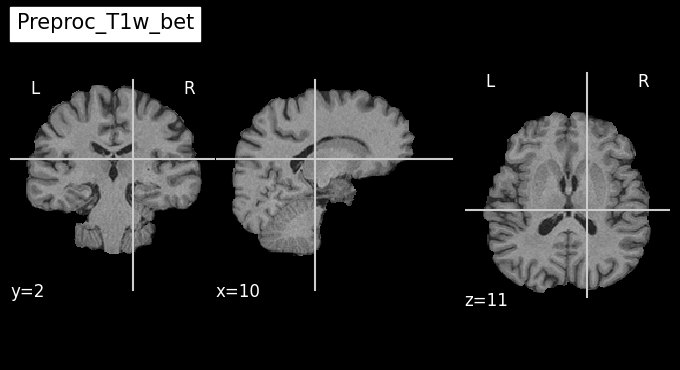

In [6]:
### Plotting the results ###
plot_anat(out.corrected_image, title="Preproc_T1w_bet", display_mode="ortho")